In [11]:
import tensorflow as tf  
import numpy as np
from tensorflow.keras import layers, models, optimizers, callbacks  
from tensorflow.keras.models import Sequential, load_model  
from tensorflow.keras.applications import EfficientNetV2B0  
from tensorflow.keras.applications.efficientnet import preprocess_input  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.metrics import confusion_matrix, classification_report

Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 2400 files belonging to 10 classes.
10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


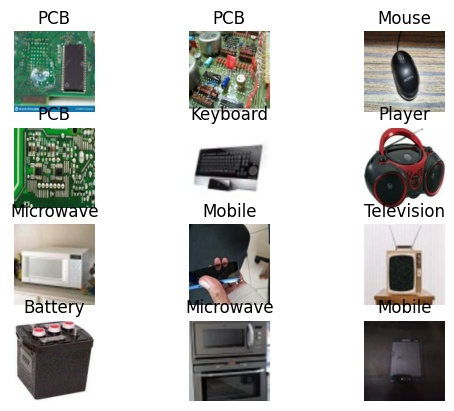

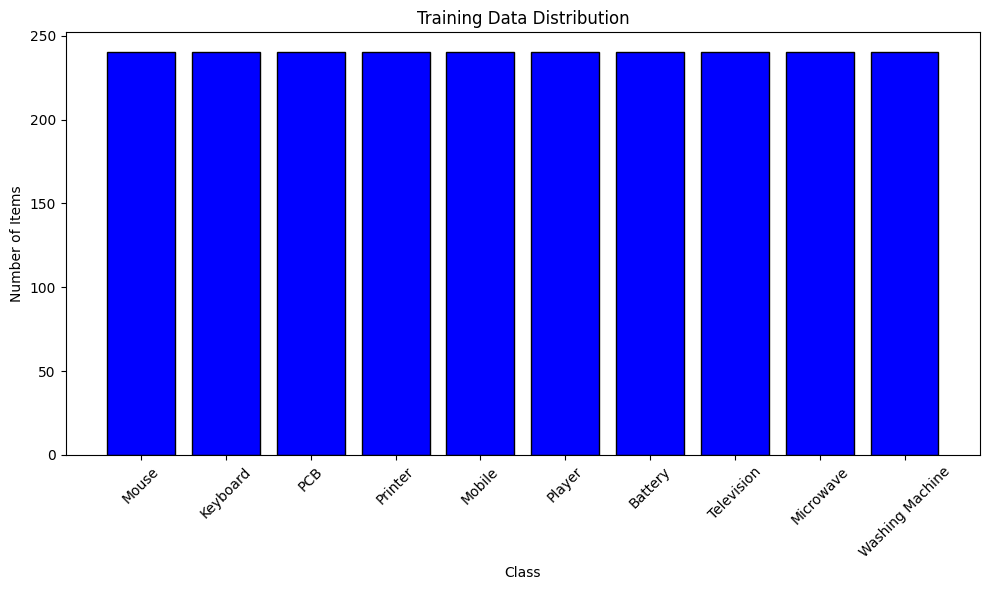

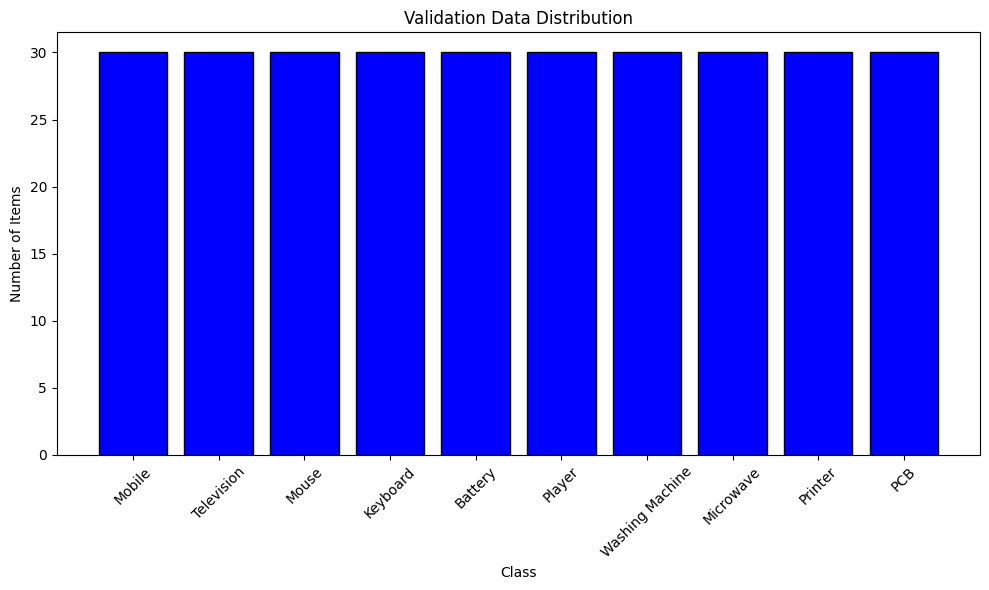

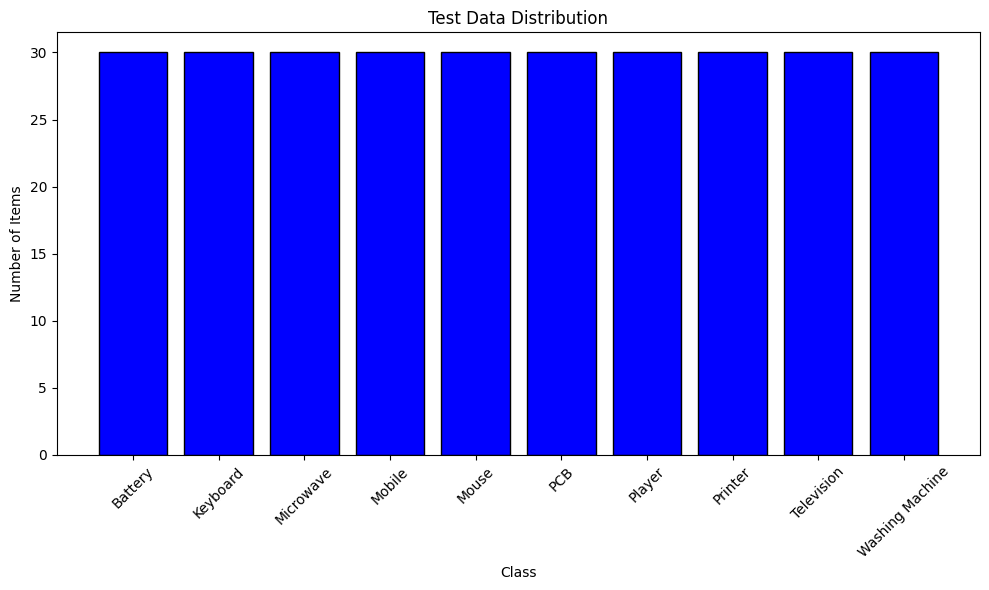

In [13]:
testpath=r'E:\AICTE INTERNSHIP\modified-dataset\test'
trainpath=r'E:\AICTE INTERNSHIP\modified-dataset\train'
validpath=r'E:\AICTE INTERNSHIP\modified-dataset\val'

datavalid=tf.keras.utils.image_dataset_from_directory(validpath,shuffle=True,batch_size=32,image_size=(128,128),validation_split=False)
datatest=tf.keras.utils.image_dataset_from_directory(testpath,shuffle=False,image_size=(128,128),batch_size=32,validation_split=False)
datatrain=tf.keras.utils.image_dataset_from_directory(trainpath,shuffle=True,image_size=(128,128),batch_size=32,validation_split=False)

print(len(datatrain.class_names))
class_names = datatrain.class_names
print(datatrain.class_names)


for images, labels in datatrain.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))

        plt.title(class_names[labels[i]])

        plt.axis("off")

def plot_class_distribution(dataset, title="Class Distribution"):

    class_counts = {}  # Dictionary to hold the count of each class

    # Iterate through the batches in the dataset
    for images, labels in dataset:
        # Convert labels tensor to numpy array and loop through each label
        for label in labels.numpy():
            class_name = dataset.class_names[label]  # Get class name using label index
            # Increment the count for this class
            class_counts[class_name] = class_counts.get(class_name, 0) + 1


    # Prepare data for plotting
    class_names = list(class_counts.keys())  # List of class names
    counts = list(class_counts.values())     # Corresponding counts for each class

    # Create the bar plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.bar(class_names, counts, color='b',edgecolor='k')  # Draw bars with class counts
    plt.xlabel("Class")  # X-axis label
    plt.ylabel("Number of Items")  # Y-axis label
    plt.title(title)  # Plot title
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()  # Display the plot
    
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [15]:

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False
    
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['Accuracy'])
# Define an EarlyStopping callback to stop training when validation loss stops improving
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',            # Metric to monitor (validation loss here)
    patience=3,                   # Number of epochs to wait after last improvement before stopping
    restore_best_weights=True     # After stopping, restore the model weights from the epoch with the best val_loss
)
# Set the number of epochs to train the model
epochs = 15

# Train the model on the training dataset 'datatrain'
history = model.fit(
    datatrain,                      # Training data generator or dataset
    validation_data=datavalid,      # Validation data generator or dataset
    epochs=epochs,                  # Number of training epochs
    batch_size=100,                 # Number of samples per gradient update
    callbacks=[early]               # List of callbacks to apply during training (e.g., early stopping)
)


Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 133s 866ms/step - Accuracy: 0.2873 - loss: 2.0775 - val_Accuracy: 0.7800 - val_loss: 1.1155
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 746ms/step - Accuracy: 0.7728 - loss: 0.9617 - val_Accuracy: 0.8967 - val_loss: 0.5332
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 756ms/step - Accuracy: 0.8740 - loss: 0.5098 - val_Accuracy: 0.9300 - val_loss: 0.3142
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 741ms/step - Accuracy: 0.9031 - loss: 0.3549 - val_Accuracy: 0.9433 - val_loss: 0.2278
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 761ms/step - Accuracy: 0.9300 - loss: 0.2546 - val_Accuracy: 0.9500 - val_loss: 0.1967
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 746ms/step - Accuracy: 0.9506 - loss: 0.1979 - val_Accuracy: 0.9533 - val_loss: 0.1745
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 57s 756ms/step - Accuracy: 0.9669 - loss: 0.1415 - val_Accuracy: 0.9667 - val_loss: 0.1567
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 56s 747ms/step - Accuracy: 0.9573 - loss: 0.1422 - val_Acc

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 4, 4, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [19]:
### Plotting Training and Validation Accuracy and Loss Over Epochs

acc = history.history['Accuracy']           # Training accuracy
val_acc = history.history['val_Accuracy']   # Validation accuracy
loss = history.history['loss']              # Training loss
val_loss = history.history['val_loss']      # Validation loss

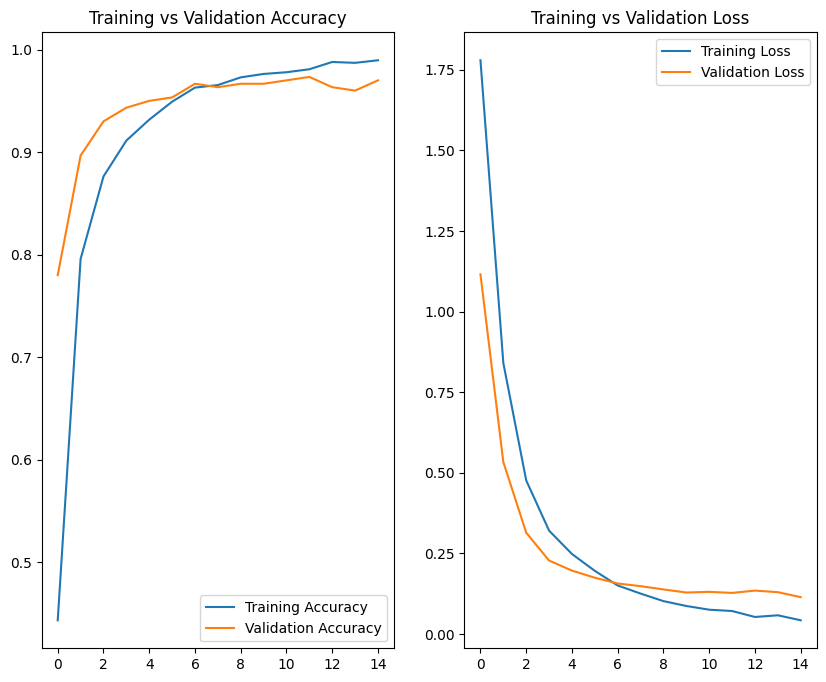

In [21]:
epochs_range = range(len(acc))              # X-axis range based on number of epochs

plt.figure(figsize=(10, 8))                 # Set overall figure size

plt.subplot(1, 2, 1)                        # 1 row, 2 columns, position 1
plt.plot(epochs_range, acc, label='Training Accuracy')       # Plot training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy') # Plot validation accuracy
plt.legend(loc='lower right')              # Show legend at lower right
plt.title('Training vs Validation Accuracy') # Set title for accuracy plot

plt.subplot(1, 2, 2)                        # 1 row, 2 columns, position 2
plt.plot(epochs_range, loss, label='Training Loss')          # Plot training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')    # Plot validation loss
plt.legend(loc='upper right')              # Show legend at upper right
plt.title('Training vs Validation Loss')    # Set title for loss plot

plt.show()                                  # Display the plots


In [23]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - Accuracy: 0.9558 - loss: 0.1351
Test accuracy is0.9633, Test loss is 0.1227


In [25]:
### Evaluate Model Performance on Test Data using Confusion Matrix and Classification Report

# Extract true labels from all batches
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)  # Ground truth labels

# Get predictions as probabilities and then predicted classes
y_pred_probs = model.predict(datatest)

# Class with highest probability
y_pred = np.argmax(y_pred_probs, axis=1)                           

# Print confusion matrix and classification report
print(confusion_matrix(y_true, y_pred))                            
print(classification_report(y_true, y_pred))                     


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step
[[28  0  0  0  0  1  1  0  0  0]
 [ 1 28  1  0  0  0  0  0  0  0]
 [ 0  0 29  0  0  0  0  1  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 29  1  0  0  0]
 [ 0  0  1  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  1  0  0  0  1  0 28  0]
 [ 1  0  0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       1.00      0.93      0.97        30
           2       0.91      0.97      0.94        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        30
           6       0.91      0.97      0.94        30
           7       0.94      1.00      0.97        30
           8       1.00      0.93      0.97        30
           9       1.00      0.97      0.98        30

    accuracy                    

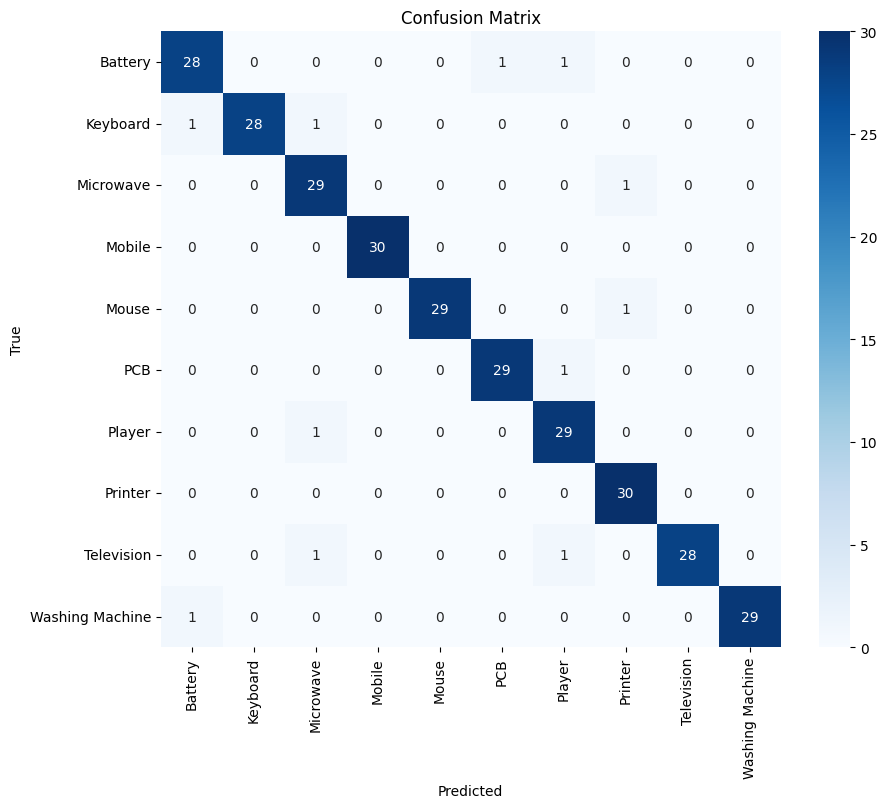

In [27]:
### Plot Confusion Matrix as Heatmap for Better Visualization

cm = confusion_matrix(y_true, y_pred)                                     # Compute confusion matrix
                                                     # Import seaborn for visualization

plt.figure(figsize=(10, 8))                                               # Set figure size
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=class_names, 
            yticklabels=class_names, 
            cmap='Blues')                                                 # Create heatmap with class labels

plt.xlabel('Predicted')                                                   # Label for x-axis
plt.ylabel('True')                                                        # Label for y-axis
plt.title('Confusion Matrix')                                             # Title for the plot
plt.show()                                                                # Display the plot
